In [19]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
%matplotlib inline
import pandas as pd

myData = pd.read_csv("star_classification.csv")

In [20]:
myData.shape

(100000, 18)

In [21]:
myData.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [22]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [26]:
myData["class"].unique()


array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [44]:
myData["class"].value_counts()


GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


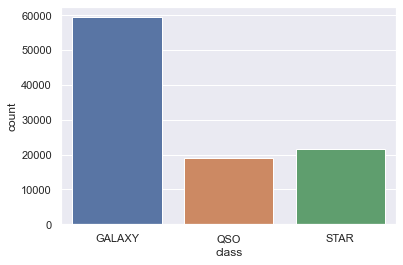

In [45]:
sns.countplot(myData["class"],label="Count")
plt.show()

In [46]:
myData = myData.drop(["rerun_ID"], axis = 1)

In [51]:
x = myData.drop(['class'], axis = 1)
y = myData.loc[:,'class'].values

In [55]:
# shuffle the data
from sklearn.utils import shuffle
x, y = shuffle(x, y)
x.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
3035,1.237679e+18,327.911684,0.979107,20.87900,19.50740,18.83967,18.55160,18.48203,7712,1,115,1.658574e+18,-0.001445,1473,52908,449
1231,1.237655e+18,163.174126,5.388352,25.23506,22.83528,21.14528,20.05072,19.57267,2126,5,294,5.465232e+18,0.547858,4854,55685,413
19579,1.237662e+18,236.028892,30.652301,25.19258,22.03289,20.24843,19.23269,18.73792,3919,5,207,5.641988e+18,0.547722,5011,55739,375
1910,1.237649e+18,245.753898,-0.095878,25.28182,23.39739,22.27000,19.39130,19.64006,745,3,581,3.895699e+17,0.002096,346,51693,31
66370,1.237679e+18,43.559383,-1.925292,21.97243,22.38624,21.77308,21.26570,20.95766,7780,4,193,1.048456e+19,0.802195,9312,57784,644


In [56]:
print(y[:5])

['STAR' 'GALAXY' 'GALAXY' 'STAR' 'GALAXY']


In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [59]:
print(x[:5])

[[ 1.64414113e+00  1.55730393e+00 -1.17875833e+00 -3.46710219e-02
  -3.22514222e-02 -4.34609496e-01 -3.03349723e-01 -5.88692519e-03
   1.64429373e+00 -1.58271045e+00 -4.77352954e-01 -1.24106764e+00
  -7.91163829e-01 -1.24107436e+00 -1.48226944e+00 -1.14768218e-03]
 [-1.19871930e+00 -1.49789916e-01 -9.54307226e-01  1.02445095e-01
   7.25632550e-02  8.08474195e-01  5.49447329e-01  2.84877671e-02
  -1.19880918e+00  9.37920462e-01  7.23906066e-01 -9.58635899e-02
  -3.94174918e-02 -9.58611096e-02  5.32783090e-02 -1.33259208e-01]
 [-2.86133594e-01  6.05167997e-01  3.31745460e-01  1.01107948e-01
   4.72912353e-02  3.24932049e-01  8.40986093e-02  2.17819253e-03
  -2.86227100e-01  9.37920462e-01  1.40053917e-01 -4.26879387e-02
  -3.96041611e-02 -4.26820266e-02  8.31377178e-02 -2.72710263e-01]
 [-1.90173433e+00  7.05943418e-01 -1.23348010e+00  1.03916964e-01
   9.02674325e-02  1.41487384e+00  1.74326303e-01  3.06117589e-02
  -1.90169589e+00 -3.22394996e-01  2.64994706e+00 -1.62283788e+00
  -7.86

In [61]:
# split the train and test set
x_train = x[:-10000]
y_train = y[:-10000]
x_test = x[-10000:]
y_test = y[-10000:]

In [63]:
# knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [64]:
knn_y_predict = knn.predict(x_test)

In [68]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, knn_y_predict))

[[5696   61  168]
 [ 364 1595   21]
 [ 413    5 1677]]


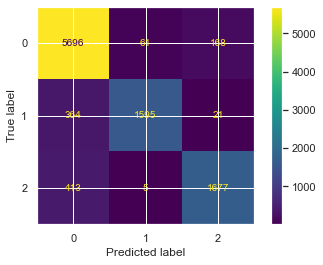

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, knn_y_predict)).plot()

In [70]:
knn.score(x_test, y_test)

0.8968

In [71]:
from sklearn import svm
svc = svm.SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc_y_predict = svc.predict(x_test)
score = svc.score(x_test, y_test)

print(np.mean(score))

0.9555


In [73]:
print(confusion_matrix(y_test, svc_y_predict))

[[5753   53  119]
 [ 239 1739    2]
 [  32    0 2063]]


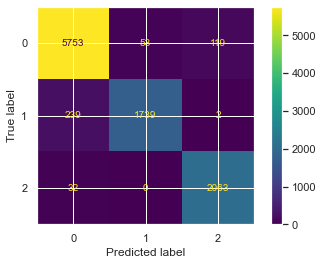

In [75]:
ConfusionMatrixDisplay(confusion_matrix(y_test, svc_y_predict)).plot()

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_y_predict))

              precision    recall  f1-score   support

      GALAXY       0.88      0.96      0.92      5925
         QSO       0.96      0.81      0.88      1980
        STAR       0.90      0.80      0.85      2095

    accuracy                           0.90     10000
   macro avg       0.91      0.86      0.88     10000
weighted avg       0.90      0.90      0.90     10000



In [78]:
print(classification_report(y_test, svc_y_predict))

              precision    recall  f1-score   support

      GALAXY       0.96      0.97      0.96      5925
         QSO       0.97      0.88      0.92      1980
        STAR       0.94      0.98      0.96      2095

    accuracy                           0.96     10000
   macro avg       0.96      0.94      0.95     10000
weighted avg       0.96      0.96      0.96     10000

